In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct,idct
from PIL import Image
import imutils
import math

In [2]:
import imutils


In [3]:
from skimage import filters

In [4]:
import pytesseract as tess
tess.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract'

In [5]:
def ratio_and_rotation(rect):
    (x, y), (width, height), rect_angle = rect
    if(width>height):
        angle = -rect_angle
    else:
        angle = 90 + rect_angle
    if angle>15:
         return False
    if height == 0 or width == 0:
        return False
    area = height*width
    if not ratioCheck(area,width,height):
        return False
    else:
        return True

def ratioCheck(area, width, height):
    ratio = float(width) / float(height)
    if ratio < 1:
        ratio = 1 / ratio
    if (area < 1063.62 or area > 73862.5) or (ratio < 3 or ratio > 6):
        return False
    return True

def isMaxWhite(plate):
    avg = np.mean(plate)
    if(avg>=115):
        return True
    else:
         return False

In [6]:
def clean2_plate(plate):
    gray_img = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY)
    if cv2.waitKey(0) & 0xff == ord('q'):
        pass
    num_contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if num_contours:
        contour_area = [cv2.contourArea(c) for c in num_contours]
        max_cntr_index = np.argmax(contour_area)
        max_cnt = num_contours[max_cntr_index]
        max_cntArea = contour_area[max_cntr_index]
        x,y,w,h = cv2.boundingRect(max_cnt)
        if not ratioCheck(max_cntArea,w,h):
            return plate,None
        final_img = thresh[y:y+h, x:x+w]
        return final_img,[x,y,w,h]
    else:
        return plate, None

# Sobel operator for edge detection

In [601]:
img=cv2.imread("Cars109.jpeg")
img_1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
if cv2.waitKey(0) & 0xff == ord('q'):
    pass

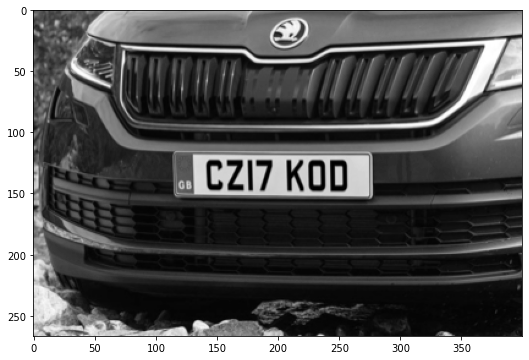

In [602]:
plt.figure(figsize=(10,6))
plt.imshow(img_1,cmap='gray')

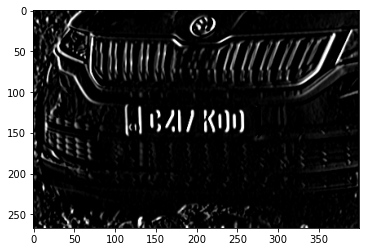

In [603]:
img_1=cv2.GaussianBlur(img_1,(3,3),0)
grad_x=cv2.Sobel(img_1,cv2.CV_8U,1,0,ksize=3)
grad_y=cv2.Sobel(img_1,cv2.CV_8U,0,1,ksize=3)
img_2=grad_x

plt.imshow(img_2,cmap='gray')

In [32]:
_,img_2 = cv2.threshold(img_2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
morph_img_threshold = img_2.copy()
cv2.morphologyEx(src=img_2, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
num_contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img_2, num_contours, -1, (0,255,0), 1)
for i,cnt in enumerate(num_contours):
    min_rect = cv2.minAreaRect(cnt)
    if ratio_and_rotation(min_rect):
        x,y,w,h = cv2.boundingRect(cnt)
        plate_img = img[y:y+h,x:x+w]
        print("Number  identified number plate...")
        cv2.imshow("num plate image",plate_img)
        if cv2.waitKey(0) & 0xff == ord('q'):
            pass
        if(isMaxWhite(plate_img)):
            clean_plate, rect = clean2_plate(plate_img)
            if rect:
                fg=0
                x1,y1,w1,h1 = rect
                x,y,w,h = x+x1,y+y1,w1,h1
                # cv2.imwrite("clena.png",clean_plate)
                plate_im = Image.fromarray(clean_plate)
                text = tess.image_to_string(plate_im, lang='eng')
                print("Number  Detected Plate Text : ",text)

Number  identified number plate...
Number  Detected Plate Text :  ™CZI7 KOD



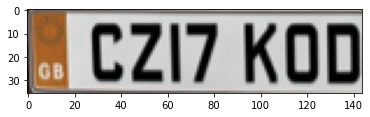

In [34]:
plt.imshow(plate_img)      #For displaying the detected Number Plate

In [35]:
print("Number  Detected Plate Text : ",text) #For displaying the recognized text

Number  Detected Plate Text :  ™CZI7 KOD



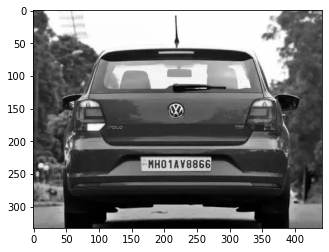

In [55]:
img=cv2.imread('Cars108.jpeg')
img_1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
if cv2.waitKey(0) & 0xff == ord('q'):
    pass
plt.imshow(img_1,cmap='gray')

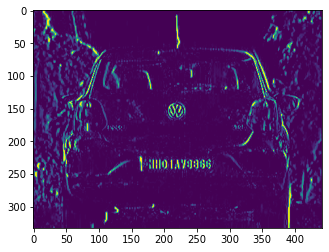

In [56]:

grad_x=cv2.Sobel(img_1,cv2.CV_8U,1,0,ksize=3)
grad_y=cv2.Sobel(img_1,cv2.CV_8U,0,1,ksize=3)
img_2=grad_x

plt.imshow(img_2)

In [54]:
_,img_2 = cv2.threshold(img_2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
morph_img_threshold = img_2.copy()
cv2.morphologyEx(src=img_2, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
num_contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img_2, num_contours, -1, (0,255,0), 1)
for i,cnt in enumerate(num_contours):
    min_rect = cv2.minAreaRect(cnt)
    if ratio_and_rotation(min_rect):
        x,y,w,h = cv2.boundingRect(cnt)
        plate_img = img[y:y+h,x:x+w]
        print("Number  identified number plate...")
        cv2.imshow("num plate image",plate_img)
        if cv2.waitKey(0) & 0xff == ord('q'):
            pass
        if(isMaxWhite(plate_img)):
            clean_plate, rect = clean2_plate(plate_img)
            if rect:
                fg=0
                x1,y1,w1,h1 = rect
                x,y,w,h = x+x1,y+y1,w1,h1
                # cv2.imwrite("clena.png",clean_plate)
                plate_im = Image.fromarray(clean_plate)
                text = tess.image_to_string(plate_im, lang='eng')
                print("Number  Detected Plate Text : ",text)

Number  identified number plate...
Number  Detected Plate Text :  MHO1AYS856



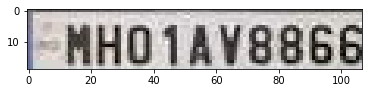

In [57]:
plt.imshow(plate_img)    #For displaying the detected Number Plate

In [58]:
 print("Number  Detected Plate Text : ",text) #For displaying the recognized text

Number  Detected Plate Text :  MHO1AYS856



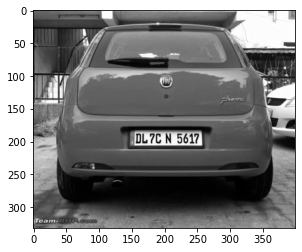

In [604]:
img=cv2.imread("Cars159.png")
img_1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
if cv2.waitKey(0) & 0xff == ord('q'):
    pass
plt.imshow(img_1,cmap='gray')

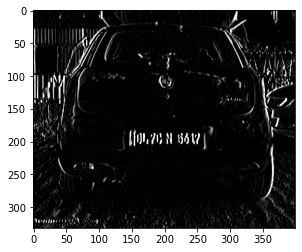

In [605]:

grad_x=cv2.Sobel(img_1,cv2.CV_8U,1,0,ksize=3)
grad_y=cv2.Sobel(img_1,cv2.CV_8U,0,1,ksize=3)
img_2=grad_x

plt.imshow(img_2,cmap='gray')

In [595]:
_,img_2 = cv2.threshold(img_2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
morph_img_threshold = img_2.copy()
cv2.morphologyEx(src=img_2, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
num_contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img_2, num_contours, -1, (0,255,0), 1)
for i,cnt in enumerate(num_contours):
    min_rect = cv2.minAreaRect(cnt)
    if ratio_and_rotation(min_rect):
        x,y,w,h = cv2.boundingRect(cnt)
        plate_img = img[y:y+h,x:x+w]
        print("Number  identified number plate...")
        cv2.imshow("num plate image",plate_img)
        if cv2.waitKey(0) & 0xff == ord('q'):
            pass
        if(isMaxWhite(plate_img)):
            clean_plate, rect = clean2_plate(plate_img)
            if rect:
                fg=0
                x1,y1,w1,h1 = rect
                x,y,w,h = x+x1,y+y1,w1,h1
                # cv2.imwrite("clena.png",clean_plate)
                plate_im = Image.fromarray(clean_plate)
                text = tess.image_to_string(plate_im, lang='eng')
                print("Number  Detected Plate Text : ",text)

Number  identified number plate...
Number  Detected Plate Text :  “DL7C N 5617



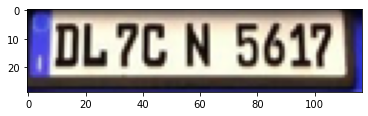

In [596]:
plt.imshow(plate_img)  #For displaying the detected Number Plate

In [597]:
 print("Number  Detected Plate Text : ",text) #For displaying the recognized text

Number  Detected Plate Text :  “DL7C N 5617



# Using Canny Edge Detection

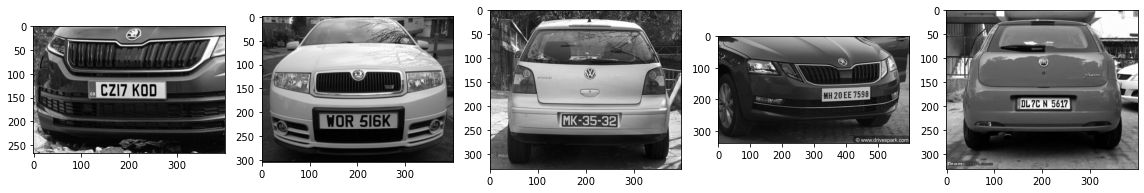

In [401]:
img1=cv2.imread("Cars109.jpeg")
img2=cv2.imread("Cars11.jpeg")
img3=cv2.imread("Cars116.png")
img4=cv2.imread("Cars259.png")
img5=cv2.imread("Cars159.png")
img=[img1,img2,img3,img4,img5]
for i in range(5):
    img[i]=cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY)       #converting to gray level
fig,axes=plt.subplots(1,5,figsize=(16,10))   
axes[0].imshow(img[0],cmap='gray')
axes[1].imshow(img[1],cmap='gray')
axes[2].imshow(img[2],cmap='gray')
axes[3].imshow(img[3],cmap='gray')
axes[4].imshow(img[4],cmap='gray')
plt.tight_layout()

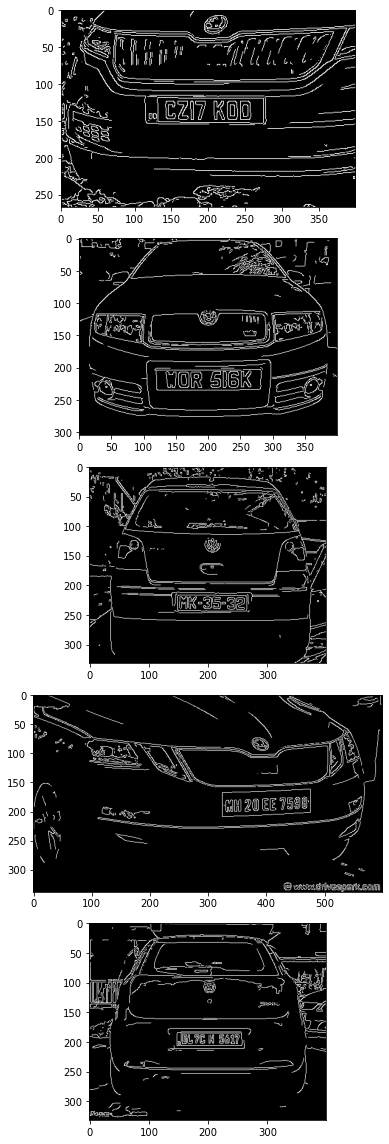

In [447]:
bfilter_0 = cv2.bilateralFilter(img[0], 11, 17, 17) #Noise reduction
edged_0 = cv2.Canny(bfilter_0, 150, 200) #Edge detection

bfilter_1 = cv2.bilateralFilter(img[1], 11, 17, 17) #Noise reduction
edged_1 = cv2.Canny(bfilter_1, 150, 200) #Edge detection

bfilter_2 = cv2.bilateralFilter(img[2], 11, 17, 17) #Noise reduction
edged_2 = cv2.Canny(bfilter_2, 150, 200) #Edge detection

bfilter_3 = cv2.bilateralFilter(img[3], 11, 17, 17) #Noise reduction
edged_3 = cv2.Canny(bfilter_3, 150, 200) #Edge detection

bfilter_4 = cv2.bilateralFilter(img[4], 11, 17, 17) #Noise reduction
edged_4 = cv2.Canny(bfilter_4, 150, 200) #Edge detection

fig,axes=plt.subplots(5,1,figsize=(28,16))   
axes[0].imshow(edged_0,cmap='gray')
axes[1].imshow(edged_1,cmap='gray')
axes[2].imshow(edged_2,cmap='gray')
axes[3].imshow(edged_3,cmap='gray')
axes[4].imshow(edged_4,cmap='gray')
plt.tight_layout()

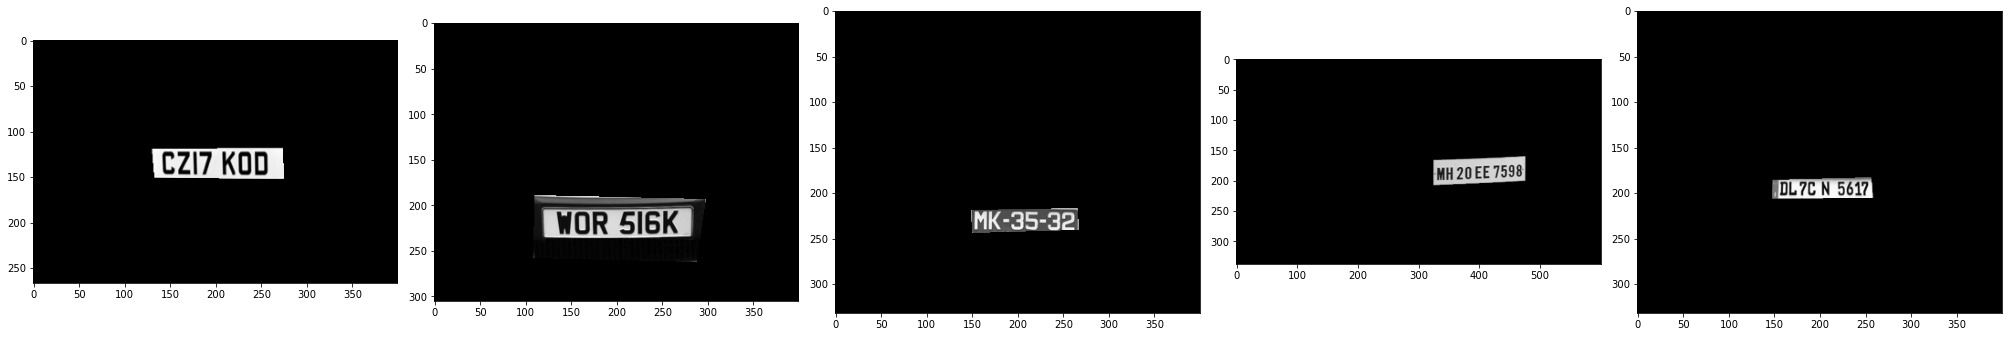

In [430]:
#1st image Plate location
keypoints = cv2.findContours(edged_0.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)    #finding 10 Contours of largest 
contours = imutils.grab_contours(keypoints)                                             #intensities
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(img[0].shape, np.uint8)                                    #masking to get take out the plate from the image 
new_image_0 = cv2.drawContours(mask, [location], 0,255, -1)
new_image_0 = cv2.bitwise_and(img[0], img[0] ,mask=mask)


#2nd image Plate location
keypoints = cv2.findContours(edged_1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(img[1].shape, np.uint8)
new_image_1 = cv2.drawContours(mask, [location], 0,255, -1)
new_image_1 = cv2.bitwise_and(img[1], img[1] ,mask=mask)
#3rd image Plate Location
keypoints = cv2.findContours(edged_2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(img[2].shape, np.uint8)
new_image_2 = cv2.drawContours(mask, [location], 0,255, -1)
new_image_2 = cv2.bitwise_and(img[2], img[2] ,mask=mask)

#4th image Plate Location 
keypoints = cv2.findContours(edged_3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(img[3].shape, np.uint8)
new_image_3 = cv2.drawContours(mask, [location], 0,255, -1)
new_image_3 = cv2.bitwise_and(img[3], img[3] ,mask=mask)

#5th image Plate Locatio
keypoints = cv2.findContours(edged_4.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(img[4].shape, np.uint8)
new_image_4 = cv2.drawContours(mask, [location], 0,255, -1)
new_image_4 = cv2.bitwise_and(img[4], img[4] ,mask=mask)

fig,axes=plt.subplots(1,5,figsize=(28,16))   
axes[0].imshow(new_image_0,cmap='gray')
axes[1].imshow(new_image_1,cmap='gray')
axes[2].imshow(new_image_2,cmap='gray')
axes[3].imshow(new_image_3,cmap='gray')
axes[4].imshow(new_image_4,cmap='gray')
plt.tight_layout()



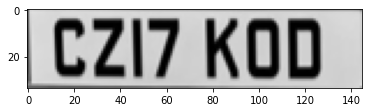

In [454]:
#1st image recognized plate
keypoints = cv2.findContours(edged_0.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(img[0].shape, np.uint8)
new_image_0 = cv2.drawContours(mask, [location], 0,255, -1)
new_image_0 = cv2.bitwise_and(img[0], img[0] ,mask=mask)
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = img[0][x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

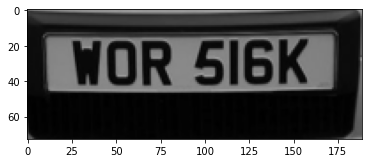

In [455]:
#2nd image recognized plate
keypoints = cv2.findContours(edged_1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(img[1].shape, np.uint8)
new_image_1 = cv2.drawContours(mask, [location], 0,255, -1)
new_image_1 = cv2.bitwise_and(img[1], img[1] ,mask=mask)
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = img[1][x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

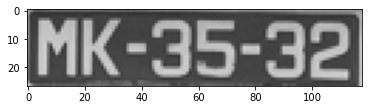

In [457]:
#3rd image recognized plate
keypoints = cv2.findContours(edged_2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(img[2].shape, np.uint8)
new_image_2 = cv2.drawContours(mask, [location], 0,255, -1)
new_image_2 = cv2.bitwise_and(img[2], img[2] ,mask=mask)
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = img[2][x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

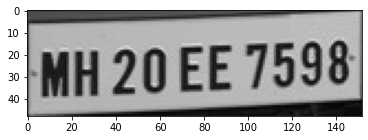

In [458]:
#4th image recognized plate
keypoints = cv2.findContours(edged_3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(img[3].shape, np.uint8)
new_image_3 = cv2.drawContours(mask, [location], 0,255, -1)
new_image_3 = cv2.bitwise_and(img[3], img[3] ,mask=mask)

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = img[3][x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


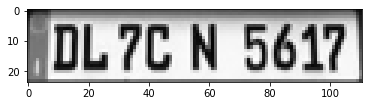

In [459]:
#5th image recognized plate
keypoints = cv2.findContours(edged_4.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(img[4].shape, np.uint8)
new_image_4 = cv2.drawContours(mask, [location], 0,255, -1)
new_image_4 = cv2.bitwise_and(img[4], img[4] ,mask=mask)

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = img[4][x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))